# **CODEALPHA-DATA SCIENCE INTERNSHIP**

---



# **TASK-01**

---



# **1.Titanic Classification**

---



In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Feature selection and preprocessing
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Fill missing age values
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Select features and target
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 79.89%


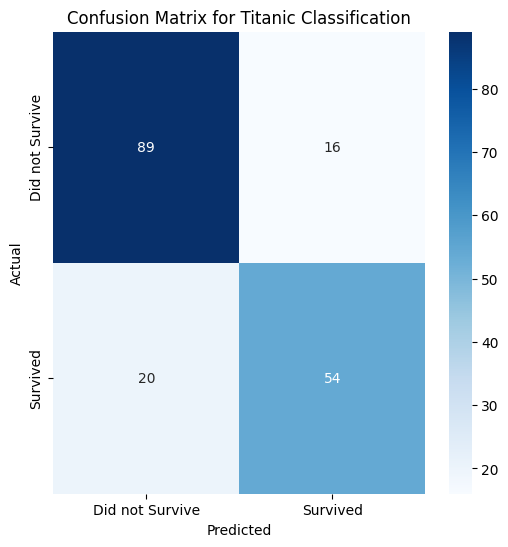

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Titanic Classification')
plt.show()


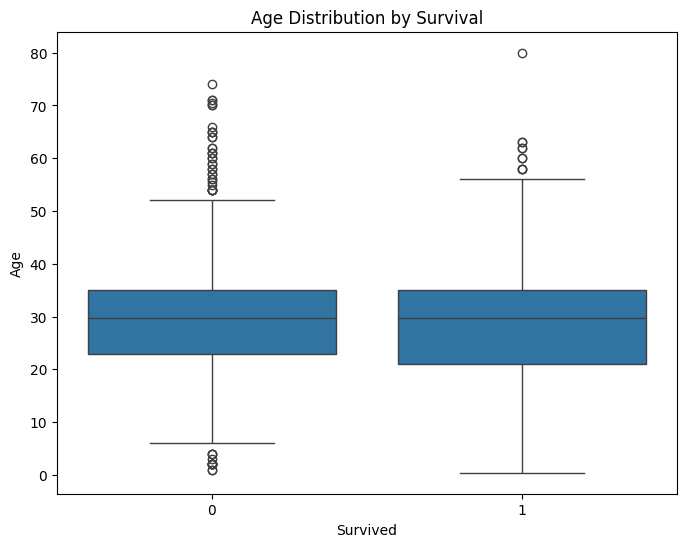

In [46]:
# Box Plot for Age Distribution by Survival
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

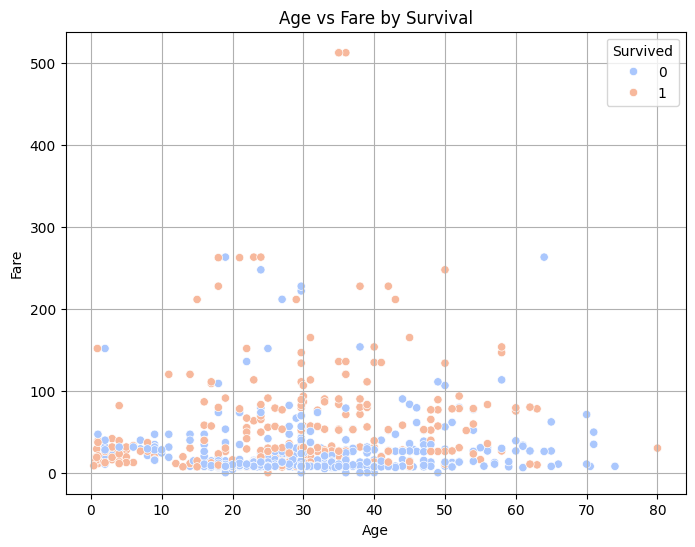

In [47]:
# Scatter Plot for Age vs Fare colored by Survival
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, palette='coolwarm')
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


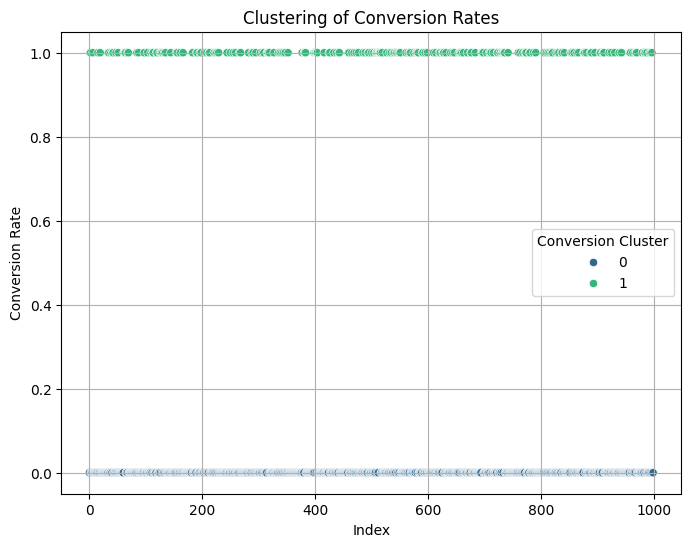

In [48]:
# Clustering (KMeans) on Conversion Data
kmeans_ab = KMeans(n_clusters=2)
df['Conversion Cluster'] = kmeans_ab.fit_predict(df[['Conversion']])

# Scatter Plot for Clustering Results
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.index, y='Conversion', hue='Conversion Cluster', palette='viridis', data=df)
plt.title('Clustering of Conversion Rates')
plt.xlabel('Index')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()
